Load Necessary Libraries

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

Load the Model

In [2]:
# Load the trained model
model_path = '../models/deepfake_detector_20241217_173339.keras'
model = tf.keras.models.load_model(model_path)

# Recompile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Model loaded successfully!")

Model loaded successfully!


In [5]:
def preprocess_frame(frame):
    # Resize to match model input size
    frame = cv2.resize(frame, (128, 128))
    
    # Convert to RGB if necessary
    if frame.shape[-1] != 3:
        frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
    
    # Normalize pixel values and ensure correct dtype
    frame = frame / 255.0
    frame = frame.astype('float32')
    
    # Add batch dimension
    return np.expand_dims(frame, axis=0)


In [21]:
# Path to the test video
video_path = '../dataset/real_videos/id0_0003.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

frame_predictions = []
frame_number = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:  # End of video
        break
    
    # Preprocess the frame
    processed_frame = preprocess_frame(frame)
    
    # Predict using the model
    prediction = model.predict(processed_frame)
    
    # Append the prediction
    frame_predictions.append(prediction[0][0])  # Assuming output is a single probability value
    
    frame_number += 1
    if frame_number % 30 == 0:  # Display progress every 30 frames
        print(f"Processed {frame_number} frames.")

cap.release()
print("Video processing completed!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/st

In [25]:
# Aggregate predictions (e.g., mean of predictions)
average_prediction = np.mean(frame_predictions)

# Threshold to classify as fake (adjust as needed)
threshold = 0.5
result = "fake" if average_prediction > threshold else "real"

print(f"Final result: {result}")
print(f"Average prediction score: {average_prediction:.4f}")


Final result: fake
Average prediction score: 0.5002


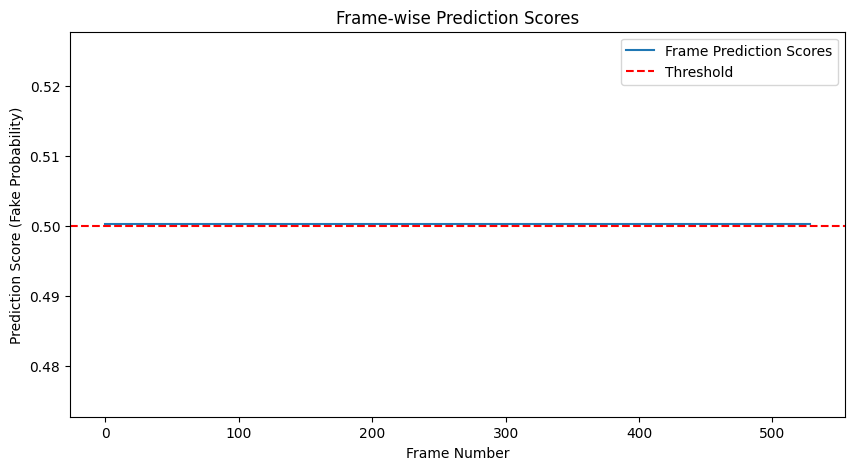

In [26]:
# Plot frame-wise prediction scores
plt.figure(figsize=(10, 5))
plt.plot(frame_predictions, label='Frame Prediction Scores')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Frame-wise Prediction Scores')
plt.xlabel('Frame Number')
plt.ylabel('Prediction Score (Fake Probability)')
plt.legend()
plt.show()
